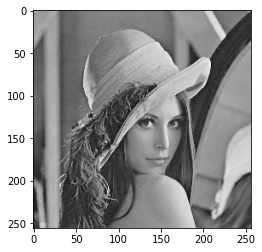

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read and display the image
file = 'lenna.jpg' 
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [11]:
# write the binary representation of the image pixels to a txt file
ram_index = 0
with open(file.split('.')[0] + '.txt', 'w') as imgfile:    
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            # print(image[row, col])
            imgfile.write("ram[{}] = 8'b{:08b};\n".format(ram_index, image[row, col]))
            ram_index += 1


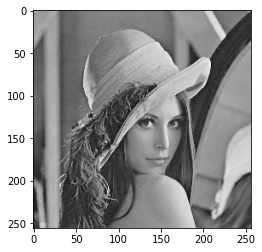

In [12]:
# read the text file and reconstruct the image
dsimagesize = 256 # size of the downsampled image
dsimage = np.zeros((dsimagesize, dsimagesize))
with open(file.split('.')[0] + '.txt', 'r') as imgfile:
    lines = imgfile.readlines()
    line = 0
    for row in range(dsimagesize):
        for col in range(dsimagesize):
            pixel_val =  int(lines[line].split(';\n')[0][-8:], 2)
            # print(pixel_val)
            dsimage[row, col] = pixel_val
            line += 1

# visualise the image
fig, ax = plt.subplots()
ax.imshow(dsimage, cmap='gray', vmin = 0, vmax = 255)
plt.show()